<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/NN_Regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importovanje biblioteka i setapovanje

In [2]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

from matplotlib import pyplot as plt

RS = 123
NUM_NEURONS_1 = 100
NUM_NEURONS_2 = 50
BATCH_SIZE = 64
NUM_EPOCHS = 100

# Ucitavanje podataka

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.33, seed=RS)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

57026/57026 [==============================] - 0s 1us/step


((339, 13), (167, 13), (339,), (167,))

# Standardizacija

In [4]:
X_train, X_test

(array([[5.11358e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.60000e+00, 1.01100e+01],
        [5.73500e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
         3.92300e+02, 6.53000e+00],
        [3.57800e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
         3.87310e+02, 3.76000e+00],
        ...,
        [9.51363e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         6.68000e+00, 1.87100e+01],
        [2.44953e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         3.30040e+02, 1.13200e+01],
        [1.96570e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
         3.76140e+02, 1.01500e+01]]),
 array([[6.11540e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
         3.89700e+02, 5.12000e+00],
        [2.14090e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
         3.77070e+02, 3.59000e+00],
        [9.06500e-02, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
         3.91340e+02, 1.36500e+01],
        ...,
        [3.51140e-01, 0.00000e+00, 7.38000e+00, ..., 1

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train, X_test

(array([[ 5.85233929, -0.48325508,  0.96757729, ...,  0.82585986,
         -3.49352799, -0.3830306 ],
        [-0.47378382, -0.48325508, -1.01913335, ...,  0.06092409,
          0.41561094, -0.88066859],
        [-0.47645529,  0.39893917, -1.18846358, ..., -1.5589399 ,
          0.3655555 , -1.26571251],
        ...,
        [ 0.69738702, -0.48325508,  0.96757729, ...,  0.82585986,
         -3.4526009 ,  0.81241261],
        [-0.17750966, -0.48325508,  1.1836193 , ..., -1.64893234,
         -0.20892842, -0.21483452],
        [-0.45654127,  0.48715859, -0.81914852, ...,  0.33090142,
          0.25350756, -0.3774704 ]]),
 array([[-0.40514677,  0.39893917, -1.09504001, ..., -2.41386811,
          0.38952995, -1.07666568],
        [-0.4543714 ,  0.48715859, -0.81914852, ...,  0.33090142,
          0.26283653, -1.28934336],
        [-0.46965958,  0.39893917, -0.65857676, ...,  0.10592031,
          0.40598103,  0.10904719],
        ...,
        [-0.4373976 , -0.48325508, -0.59726754, ...,  

# Kreiranje mreze

In [7]:
input_size = X_train.shape[1]
output_size = 1

In [8]:
model = Sequential([
    InputLayer(input_shape=((input_size,))),
    Dense(units=NUM_NEURONS_1, activation="relu"),
    Dense(units=NUM_NEURONS_2, activation="relu"),
    Dense(units=1)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6501 (25.39 KB)
Trainable params: 6501 (25.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Treniranje mreze

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [11]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1)

Epoch 1/100
5/5 [==============================] - 5s 282ms/step - loss: 564.7050 - mean_absolute_error: 21.4699 - val_loss: 590.2160 - val_mean_absolute_error: 20.7991
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: 540.9160 - mean_absolute_error: 21.3325 - val_loss: 566.0493 - val_mean_absolute_error: 20.1916
Epoch 3/100
5/5 [==============================] - 0s 35ms/step - loss: 516.1458 - mean_absolute_error: 20.6396 - val_loss: 540.1650 - val_mean_absolute_error: 19.5349
Epoch 4/100
5/5 [==============================] - 0s 56ms/step - loss: 490.4442 - mean_absolute_error: 19.5262 - val_loss: 512.2053 - val_mean_absolute_error: 18.8155
Epoch 5/100
5/5 [==============================] - 0s 45ms/step - loss: 461.7866 - mean_absolute_error: 19.1294 - val_loss: 482.1482 - val_mean_absolute_error: 18.0412
Epoch 6/100
5/5 [==============================] - 0s 44ms/step - loss: 430.6098 - mean_absolute_error: 18.3971 - val_loss: 448.5771 - val_mean_absolute_error:

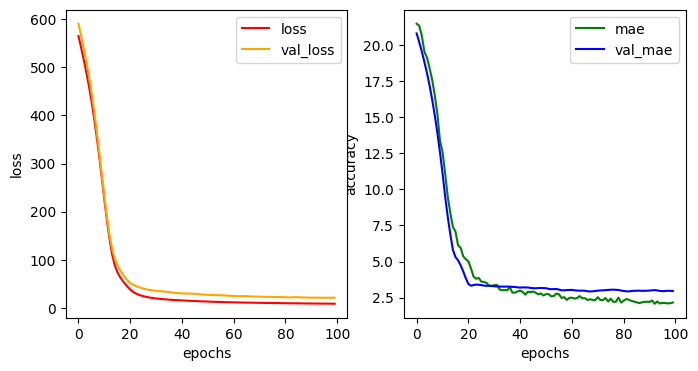

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(history.epoch, history.history["loss"], label="loss", color="red")
ax[0].plot(history.epoch, history.history["val_loss"], label="val_loss", color="orange")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(history.epoch, history.history["mean_absolute_error"], label="mae", color="green")
ax[1].plot(history.epoch, history.history["val_mean_absolute_error"], label="val_mae", color="blue")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()

plt.show()

#Ocenjivanje mreze

In [13]:
scores = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 5ms/step - loss: 17.2046 - mean_absolute_error: 2.7983


In [14]:
model.metrics_names

['loss', 'mean_absolute_error']

In [15]:
scores

[17.20464515686035, 2.798276901245117]

In [16]:
y_predict = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [17]:
r2 = r2_score(y_test, y_predict)
r2

0.7727537452279627

In [18]:
X_train.shape

(339, 13)

In [19]:
X_new = np.random.randn(input_size)
X_new = X_new.reshape(1, 13)
X_new = scaler.transform(X_new)

In [20]:
y_new = model.predict(X_new)

1/1 [==============================] - 0s 21ms/step


In [21]:
y_new

array([[62.343246]], dtype=float32)